In [143]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
from glob import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import numpy as np
import xarray as xr

In [145]:
inputdata = "/glade/p/cesmdata/cseg/inputdata"

In [149]:
case = 'cam6327_sd.apo_test_srf_emis.005'
files = sorted(glob(f'/glade/scratch/mclong/{case}/run/{case}.cam.h0.*.nc'))
files = files[:31]

In [150]:
ds = xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:           (lat: 192, lon: 288, time: 124, lev: 56, ilev: 57, nbnd: 2)
Coordinates:
  * lat               (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon               (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev               (lev) float64 1.868 2.353 2.948 ... 962.5 977.5 992.5
  * ilev              (ilev) float64 1.651 2.085 2.62 ... 970.0 985.0 1e+03
  * time              (time) datetime64[ns] 1986-01-01 ... 1986-01-31T18:00:00
Dimensions without coordinates: nbnd
Data variables: (12/426)
    gw                (time, lat) float64 dask.array<chunksize=(4, 192), meta=np.ndarray>
    hyam              (time, lev) float64 dask.array<chunksize=(4, 56), meta=np.ndarray>
    hybm              (time, lev) float64 dask.array<chunksize=(4, 56), meta=np.ndarray>
    P0                (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai              (time, ilev) float64 dask.array<chunksize=(4, 57), meta=np.ndarray>
    hybi              (time, ilev) float64 dask.array<chunksize=(4, 57), meta=np.ndarray>
    ...                ...
    soa_a2SFWET       (time, lat, lon) float32 dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    soa_a2_SRF        (time, lat, lon) float32 dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    soa_c1            (time, lev, lat, lon) float32 dask.array<chunksize=(4, 56, 192, 288), meta=np.ndarray>
    soa_c1SFWET       (time, lat, lon) float32 dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    soa_c2            (time, lev, lat, lon) float32 dask.array<chunksize=(4, 56, 192, 288), meta=np.ndarray>
    soa_c2SFWET       (time, lat, lon) float32 dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              cam6327_sd.apo_test_srf_emis.005
    logname:           mclong
    host:              cheyenne4
    initial_file:      /glade/work/mclong/cam-sd-cases/data/f.e20.FWAMIP.f09_...
    topography_file:   /glade/work/tilmes/inputdata/topo/fv_0.9x1.25_nc3000_N...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_6

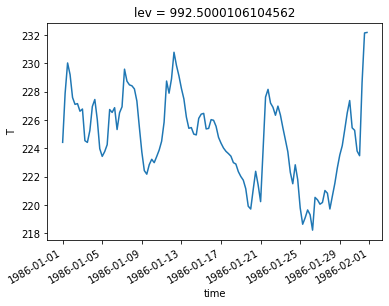

In [151]:
ds.T.isel(lev=-1).min(['lat', 'lon']).plot()

In [152]:
run_startdate = '1986-01-01'
met_data_path = f'{inputdata}/atm/cam/met/MERRA2/0.9x1.25'
merra_files = sorted(glob(f'{met_data_path}/{run_startdate[:4]}/MERRA2_0.9x1.25_{run_startdate[:4]}{run_startdate[5:7]}??.nc'))
merra_files

['/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860101.nc',
 '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860102.nc',
 '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860103.nc',
 '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860104.nc',
 '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860105.nc',
 '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860106.nc',
 '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860107.nc',
 '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860108.nc',
 '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860109.nc',
 '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/0.9x1.25/1986/MERRA2_0.9x1.25_19860110.nc',
 '/glade/p/cesmdata/

In [153]:
ds_merra = xr.open_mfdataset(merra_files)
ds_merra

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, lev: 72, time: 248, ilev: 73)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.7
  * lev      (lev) float32 0.015 0.02635 0.04014 0.05679 ... 962.5 977.5 992.5
  * time     (time) datetime64[ns] 1986-01-01 ... 1986-01-31T21:00:00
  * ilev     (ilev) float32 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
Data variables: (12/20)
    date     (time) int32 dask.array<chunksize=(8,), meta=np.ndarray>
    datesec  (time) int32 dask.array<chunksize=(8,), meta=np.ndarray>
    hyam     (time, lev) float32 dask.array<chunksize=(8, 72), meta=np.ndarray>
    hybm     (time, lev) float32 dask.array<chunksize=(8, 72), meta=np.ndarray>
    hyai     (time, ilev) float32 dask.array<chunksize=(8, 73), meta=np.ndarray>
    hybi     (time, ilev) float32 dask.array<chunksize=(8, 73), meta=np.ndarray>
    ...       ...
    TS       (time, lat, lon) float32 dask.array<chunksize=(8, 192, 288), meta=np.ndarray>
    T        (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 192, 288), meta=np.ndarray>
    Q        (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 192, 288), meta=np.ndarray>
    PHIS     (time, lat, lon) float32 dask.array<chunksize=(8, 192, 288), meta=np.ndarray>
    QFLX     (time, lat, lon) float32 dask.array<chunksize=(8, 192, 288), meta=np.ndarray>
    SHFLX    (time, lat, lon) float32 dask.array<chunksize=(8, 192, 288), meta=np.ndarray>

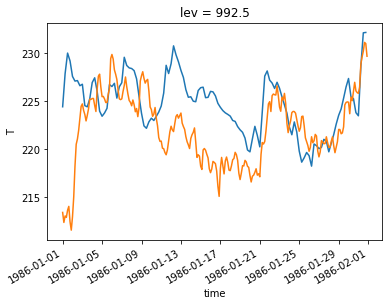

In [154]:
ds.T.isel(lev=-1).min(['lat', 'lon']).plot()
ds_merra.T.isel(lev=-1).min(['lat', 'lon']).plot()

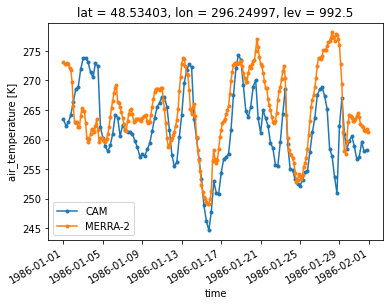

In [155]:
xi, yi = 237, 147
ds.T.isel(lev=-1, lat=yi, lon=xi).plot(label='CAM', marker='.')

ds_merra.T.isel(lev=-1, lat=yi, lon=xi).plot(label='MERRA-2', marker='.')
plt.legend();

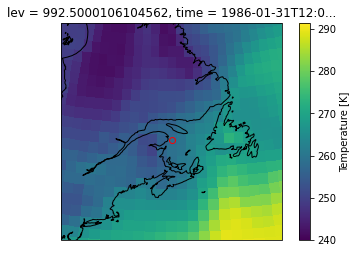

In [156]:
extent = [ds.lon[xi-10], ds.lon[xi+10], ds.lat[yi-10], ds.lat[yi+10]]

map_proj = ccrs.LambertConformal(
    central_longitude=np.mean(extent[:2]), 
    central_latitude=np.mean(extent[2:]))

p = ds.T.isel(lev=-1, time=-2, lat=slice(yi-20, yi+20), lon=slice(xi-20, xi+20)).plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": map_proj},
)
plt.plot(ds.lon[xi], ds.lat[yi], 'ro', markerfacecolor='none')

ax = p.axes
ax.coastlines()
ax.set_extent(extent)
          

In [157]:
path = '/glade/p/cesmdata/cseg/inputdata/atm/cam/sst/sst_HadOIBl_bc_0.9x1.25_1850_2020_c210521.nc'
ds_sst = xr.open_dataset(path)
ds_sst

<xarray.Dataset>
Dimensions:            (time: 2064, lon: 288, lat: 192)
Coordinates:
  * lon                (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lat                (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * time               (time) object 1850-01-16 12:00:00 ... 2021-12-16 12:00:00
Data variables:
    date               (time) int32 ...
    datesec            (time) int32 ...
    ice_cov            (time, lat, lon) float32 ...
    ice_cov_prediddle  (time, lat, lon) float32 ...
    SST_cpl            (time, lat, lon) float32 ...
    SST_cpl_prediddle  (time, lat, lon) float32 ...
Attributes:
    history:           N/A
    data_mods:         N/A
    climo_years:       1982-2001
    data_reference:    Hurrell et al, 2008: A New Sea Surface Temperature and...
    data_doi:          N/A
    data_source_url:   via dennis shea ftp://ftp.cgd.ucar.edu/archive/SSTICE/
    data_script:       regrid and bcgen under model tools
    data_creator:      Julie Caron, jcaron@ucar.edu
    cesm_contact:      Cecile Hannay, hannay@ucar.edu
    data_description:  SST and ICE boundary dataset created from merged Reyno...
    data_summary:      SST and ICE boundary dataset for CAM
    creation_date:     Fri May 21 11:36:52 MDT 2021

In [158]:
slice(yi-20, yi+20)

slice(127, 167, None)

In [159]:
ds_sst.SST_cpl.sel(time='1986-01', lat=slice(yi-20, yi+20), lon=slice(xi-20, xi+20))

<xarray.DataArray 'SST_cpl' (time: 1, lat: 0, lon: 32)>
array([], shape=(1, 0, 32), dtype=float32)
Coordinates:
  * lon      (lon) float64 217.5 218.8 220.0 221.2 ... 252.5 253.8 255.0 256.2
  * lat      (lat) float64 
  * time     (time) object 1986-01-16 12:00:00
Attributes:
    long_name:  BCS Pseudo SST
    units:      deg_C

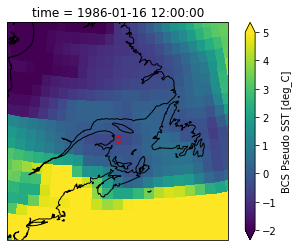

In [160]:
p = ds_sst.SST_cpl.sel(time='1986-01').isel(lat=slice(yi-20, yi+20), lon=slice(xi-20, xi+20)).plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": map_proj},
    vmin=-2.0, vmax=5.0,
)
plt.plot(ds.lon[xi], ds.lat[yi], 'ro', markerfacecolor='none')

ax = p.axes
ax.coastlines()
ax.set_extent(extent)

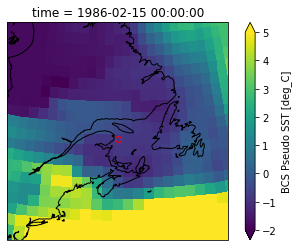

In [161]:
p = ds_sst.SST_cpl.sel(time='1986-02').isel(lat=slice(yi-20, yi+20), lon=slice(xi-20, xi+20)).plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": map_proj},
    vmin=-2.0, vmax=5.0,
)
plt.plot(ds.lon[xi], ds.lat[yi], 'ro', markerfacecolor='none')

ax = p.axes
ax.coastlines()
ax.set_extent(extent)

In [162]:
len(x)

112

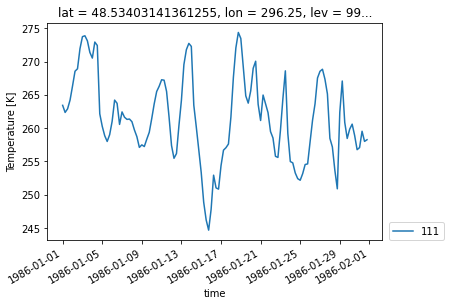

In [163]:

for n in range(111, 112):
    xi, yi = x[n], y[n]
    ds.T.isel(lev=-1, lat=yi, lon=xi).plot(label=n)

plt.legend(loc=(1.02, 0));

In [164]:
yi

147